# Dataset description

## Dataset info

link https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma/data


## Problem description

Services like Uber and Lyft have transformed urban transportation, offering flexibility and convenience to millions of users. This project leverages a comprehensive dataset from Kaggle, featuring Uber and Lyft trip data from Boston, to uncover patterns and relationships affecting ride prices, travel times, and service availability. The primary objective is to gain actionable insights that benefit both users and service providers.

The dataset contains detailed information about Uber and Lyft rides in Boston, including attributes such as date, time, pickup and drop-off coordinates, ride costs across different service categories, weather conditions, travel distance, and the impact of traffic congestion. Using this data, the project aims to understand pricing dynamics, such as how factors like time of day, day of the week, and weather influence ride prices. It also seeks to compare Uber and Lyft services to identify differences in pricing strategies, availability, and user experience

# Dependencies loading

In [147]:
#libraries
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# dataset split
from sklearn.model_selection import train_test_split

# missing values imputing
from sklearn.impute import KNNImputer

np.random.seed(2024)

# Data loading

In [148]:
data = pd.read_csv('../input_data/rideshare_kaggle.csv')
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


# Data info

In [149]:
sum(data.id.value_counts()>1)

0

It looks like we don't have any duplicates of rides, so we can get rid of id column.

In [150]:
data=data.drop(['id'],axis=1)

## Unique values

In [151]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   timestamp                    693071 non-null  float64
 1   hour                         693071 non-null  int64  
 2   day                          693071 non-null  int64  
 3   month                        693071 non-null  int64  
 4   datetime                     693071 non-null  object 
 5   timezone                     693071 non-null  object 
 6   source                       693071 non-null  object 
 7   destination                  693071 non-null  object 
 8   cab_type                     693071 non-null  object 
 9   product_id                   693071 non-null  object 
 10  name                         693071 non-null  object 
 11  price                        637976 non-null  float64
 12  distance                     693071 non-null  float64
 13 

In [152]:
data.columns

Index(['timestamp', 'hour', 'day', 'month', 'datetime', 'timezone', 'source',
       'destination', 'cab_type', 'product_id', 'name', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax

In [153]:
data.shape

(693071, 56)

In [154]:
data.nunique().sort_values()

timezone                           1
month                              2
cab_type                           2
uvIndex                            3
icon                               7
surge_multiplier                   7
short_summary                      9
latitude                          11
long_summary                      11
destination                       12
source                            12
longitude                         12
product_id                        13
name                              13
day                               17
moonPhase                         18
uvIndexTime                       20
temperatureHighTime               23
temperatureMaxTime                23
hour                              24
temperatureMinTime                25
windGustTime                      25
apparentTemperatureMaxTime        27
apparentTemperatureHighTime       27
precipProbability                 29
apparentTemperatureMinTime        29
temperatureLowTime                31
a

We have only 1 timezone so we can drop it.


In [155]:
data=data.drop(['timezone'],axis=1)

In [156]:
duplicated_rows = data[data.duplicated(keep=False)]
print(duplicated_rows)

           timestamp  hour  day  month             datetime  \
5059    1.543464e+09     3   29     11  2018-11-29 03:56:07   
5334    1.543275e+09    23   26     11  2018-11-26 23:33:14   
5862    1.543316e+09    10   27     11  2018-11-27 10:45:23   
6011    1.543350e+09    20   27     11  2018-11-27 20:15:22   
6227    1.543238e+09    13   26     11  2018-11-26 13:20:09   
...              ...   ...  ...    ...                  ...   
690733  1.544958e+09    10   16     12  2018-12-16 10:55:04   
690736  1.544958e+09    10   16     12  2018-12-16 10:55:04   
691761  1.544922e+09     0   16     12  2018-12-16 00:55:05   
692491  1.543294e+09     4   27     11  2018-11-27 04:42:21   
692714  1.543441e+09    21   28     11  2018-11-28 21:38:08   

                         source              destination cab_type  \
5059          Boston University                 Back Bay     Uber   
5334              North Station                   Fenway     Uber   
5862         Financial District     

In [157]:
data.duplicated().sum()

np.int64(1046)

In [158]:
data = data.drop_duplicates()
data.shape

(692025, 55)

We got rid of duplicated rows

## Null values

In [159]:
data.isnull().sum().sort_values(ascending=False)


price                          54703
hour                               0
timestamp                          0
month                              0
datetime                           0
source                             0
day                                0
destination                        0
cab_type                           0
product_id                         0
name                               0
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
visibility                         0
temperatureHigh                    0
t

In [160]:
data  = data.dropna()


We removed null values

## Reducing number of columns

In [161]:
data['product_id'].sample(20)

300026                                lyft_lux
497329                            lyft_premier
675744                               lyft_plus
396840    55c66225-fbe7-4fd5-9072-eab1ece5e23e
409779                               lyft_line
547927                               lyft_plus
493298                               lyft_plus
551445                             lyft_luxsuv
487562    9a0e7b09-b92b-4c41-9779-2ad22b4d779d
13443                                 lyft_lux
604375    997acbb5-e102-41e1-b155-9df7de0a73f2
325251    6d318bcc-22a3-4af6-bddd-b409bfce1546
472401                                    lyft
319168                                    lyft
4006      55c66225-fbe7-4fd5-9072-eab1ece5e23e
105243    6c84fd89-3f11-4782-9b50-97c468b19529
243886    55c66225-fbe7-4fd5-9072-eab1ece5e23e
476342                            lyft_premier
390684    55c66225-fbe7-4fd5-9072-eab1ece5e23e
383534                               lyft_plus
Name: product_id, dtype: object

In [162]:
data=data.drop(['product_id'],axis=1)

We can also get rid of latitude and longitude

In [163]:
data=data.drop(['latitude','longitude','timestamp' ],axis=1)

In [164]:
data.columns

Index(['hour', 'day', 'month', 'datetime', 'source', 'destination', 'cab_type',
       'name', 'price', 'distance', 'surge_multiplier', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime'],
      dtype='object')

### Checking the correlation between Price and Temperature related features

In [165]:
data_temp= data[['price','temperature','apparentTemperature','temperatureHigh','temperatureHighTime', 'temperatureLow', 'temperatureLowTime','apparentTemperatureHigh', 'apparentTemperatureHighTime','apparentTemperatureLow', 'apparentTemperatureLowTime','temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime','apparentTemperatureMin', 'apparentTemperatureMinTime','apparentTemperatureMax', 'apparentTemperatureMaxTime' ]]

<Axes: >

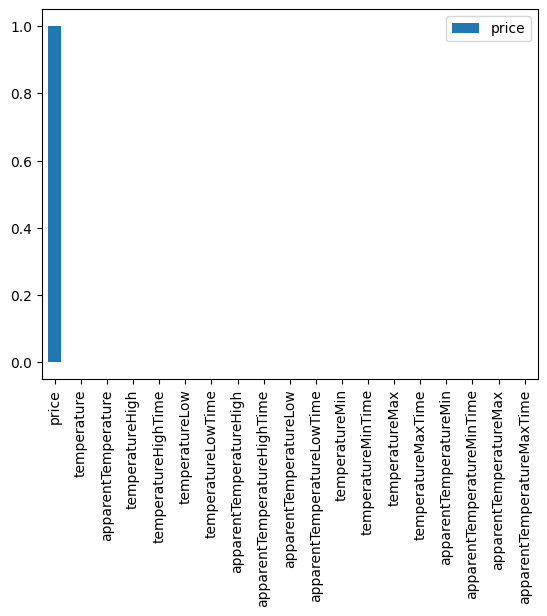

In [166]:
correlation=data_temp.corr()[['price']]
price_corr=correlation[(correlation['price']>0.0001)|(correlation['price']<-0.0001)] #OR
price_corr.plot.bar()

We are getting rid of tempareture features as they do not impact price

In [167]:
data = data.drop(['temperature','temperatureHigh','temperatureHighTime', 'temperatureLow', 'temperatureLowTime','apparentTemperatureHigh', 'apparentTemperatureHighTime','apparentTemperatureLow', 'apparentTemperatureLowTime','temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime','apparentTemperature','apparentTemperatureMin', 'apparentTemperatureMinTime','apparentTemperatureMax', 'apparentTemperatureMaxTime' ], axis=1)

In [168]:
data.columns

Index(['hour', 'day', 'month', 'datetime', 'source', 'destination', 'cab_type',
       'name', 'price', 'distance', 'surge_multiplier', 'short_summary',
       'long_summary', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'windGust', 'windGustTime', 'visibility', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime'],
      dtype='object')

### Checking the correlation between Price and other environmental features

In [178]:
data_env= data[['price', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime']]

<Axes: >

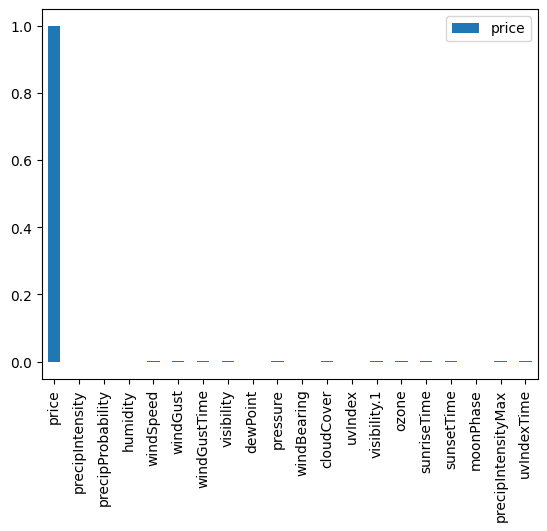

In [179]:
correlation=data_env.corr()[['price']]
price_corr=correlation[(correlation['price']>0.0001)|(correlation['price']<-0.0001)] #OR
price_corr.plot.bar()

In [180]:
data = data.drop([ 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime'], axis=1)

In [182]:
data.columns

Index(['hour', 'day', 'month', 'datetime', 'source', 'destination', 'cab_type',
       'name', 'price', 'distance', 'surge_multiplier', 'short_summary',
       'long_summary', 'icon'],
      dtype='object')

In [170]:
data.groupby(['cab_type','name'])['price'].sum()


cab_type  name        
Lyft      Lux              910149.00
          Lux Black       1180990.05
          Lux Black XL    1655514.55
          Lyft             492178.68
          Lyft XL          783873.20
          Shared           308829.00
Uber      Black           1129161.00
          Black SUV       1666284.00
          UberPool         481623.00
          UberX            537125.00
          UberXL           862878.50
          WAV              537187.50
Name: price, dtype: float64

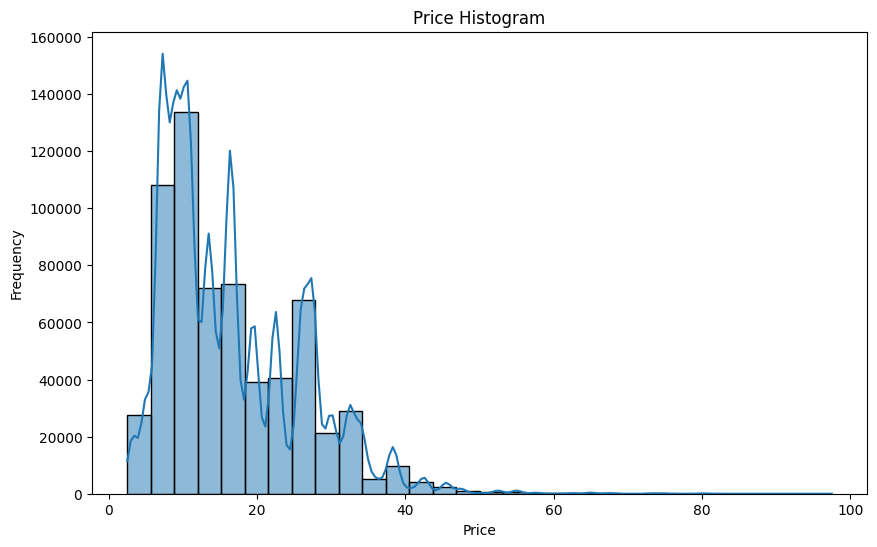

In [171]:
# Histogram of prices
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

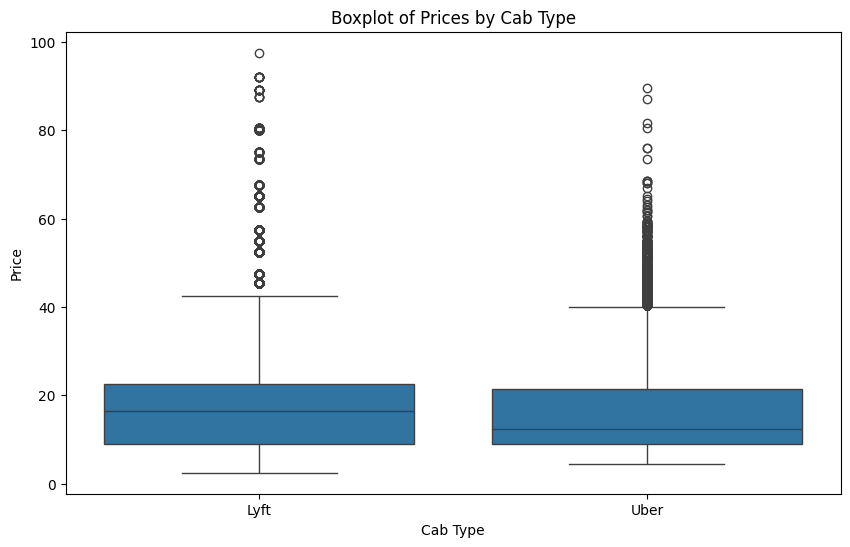

In [172]:
# Boxplot of prices by cab type
plt.figure(figsize=(10, 6))
plot = sns.boxplot(x='cab_type', y='price', data=data)
plt.title('Boxplot of Prices by Cab Type')
plt.xlabel('Cab Type')
plt.ylabel('Price')
#fig = plot.get_figure()
#fig.savefig('eda_output/boxplot.png')
plt.show()


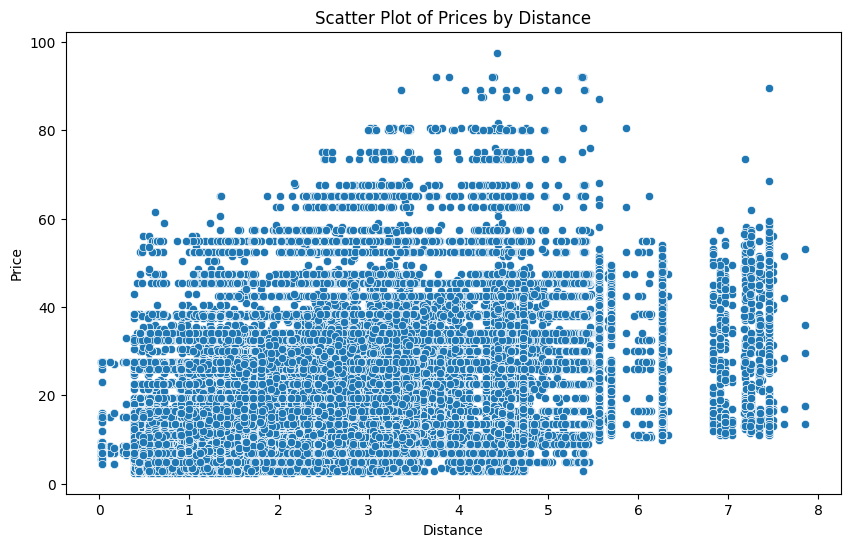

In [173]:

# Scatter plot of prices by distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='price', data=data)
plt.title('Scatter Plot of Prices by Distance')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show()